# Notebook 32: P and T axes

In a fault, the infinitesimal shortening $\mathbf{P}$ and extension $\mathbf{T}$ are at 45° to the slip vector (fault striae), and they lie on the plane defined by the fault striae and the fault pole. This plane is known as the movement plane *M*. This is represented in the figure below, in a block diagram (a), and a stereonet (b):

<img src="../figures/p_t_axes.jpg" alt="p_t_axes" width="750" style="display: block; margin: 0 auto"/><br><br>

The $\mathbf{P}$ and $\mathbf{T}$ axes are therefore a simple, direct representation of fault geometry and the orientation and sense of slip (Allmendinger et al., 1989).

## Python functions

The module [fault_kin](../functions/fault_kin.py) contains three functions to work with fault slip data:

1. Function pt_axes computes and plots the $\mathbf{P}$ and $\mathbf{T}$ axes from the orientation of several faults and their slip vectors. The axes are plotted in an equal area stereonet.

2. Function kin_axes computes the kinematic axes from the orientation of P and T axes. These are the eigenvectors of a matrix, $\mathbf{K}$, composed of the sums of the products and the squares of the direction cosines of the individual $\mathbf{P}$ and $\mathbf{T}$ axes (Allmendinger et al., 1989).

3. Function fault_solution computes the two possible faults separating the $\mathbf{P}$ and $\mathbf{T}$ axes quadrants. These planes are computed from the kinematic axes.

## Application

Let's use these functions to plot the $\mathbf{P}$ and $\mathbf{T}$ axes and fault plane solution, for a group of faults from the Central Andes in Argentina. The file [jujuy.txt](../data/jujuy.txt) contains the orientation (strike and dip) of the faults, and the orientation (trend and plunge) and sense of movement of the slip vectors (striae).

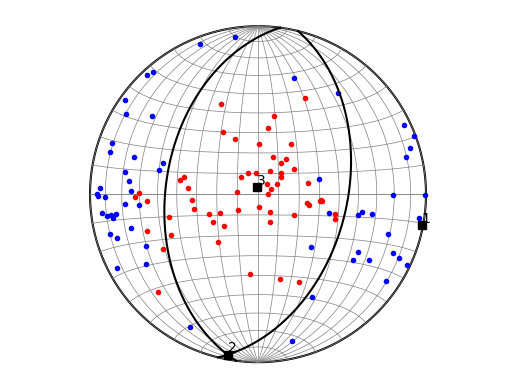

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import functions
from fault_kin import pt_axes, kin_axes, fault_solution
from st_coord_line import st_coord_line
from great_circle import great_circle

# read the faults
path = os.path.join("..", "data", "jujuy.txt")
jujuy=np.loadtxt(path, usecols = [0,1,2,3])
fault = np.radians(jujuy[:,0:2])
slip = np.radians(jujuy[:,2:4])
sense=np.loadtxt(path, usecols = 4, dtype = "str")

# compute and plot P and T axes
# don't plot the faults and slip vectors
fig, ax = plt.subplots()
P, T, _ = pt_axes(fault,slip,sense,0,ax)

# compute kinematic axes
ev = kin_axes(P, T)
# plot the kinematic axes
for i in range(3):
    xp , yp = st_coord_line(ev[i,0], ev[i,1], 1)
    ax.plot(xp, yp, "ks")
    ax.text(xp, yp, f"{i+1}", va="bottom", ha="left")

# compute the fault plane solution
fps = fault_solution(ev)

# plot the two possible faults
path_1 = great_circle(fps[0,0], fps[0,1], 1)
path_2 = great_circle(fps[1,0], fps[1,1], 1)
ax.plot(path_1[:,0], path_1[:,1], "k-")
ax.plot(path_2[:,0], path_2[:,1], "k-")

plt.show()

The red dots are the $\mathbf{T}$ axes, and the blue dots are the $\mathbf{P}$ axes. The great circles separate the quadrants of infinitesimal extension ($\mathbf{T}$ axes inside) and infinitesimal shortening ($\mathbf{P}$ axes inside). The fault solution suggests reverse faulting, which makes sense since the measured faults are marked as thrusts. The only thing left is coloring the $\mathbf{T}$ axes quadrant to produce a *beach ball* diagram. I leave this to you.